/Users/jun/Documents/Codes/miniforge3_Rosetta/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


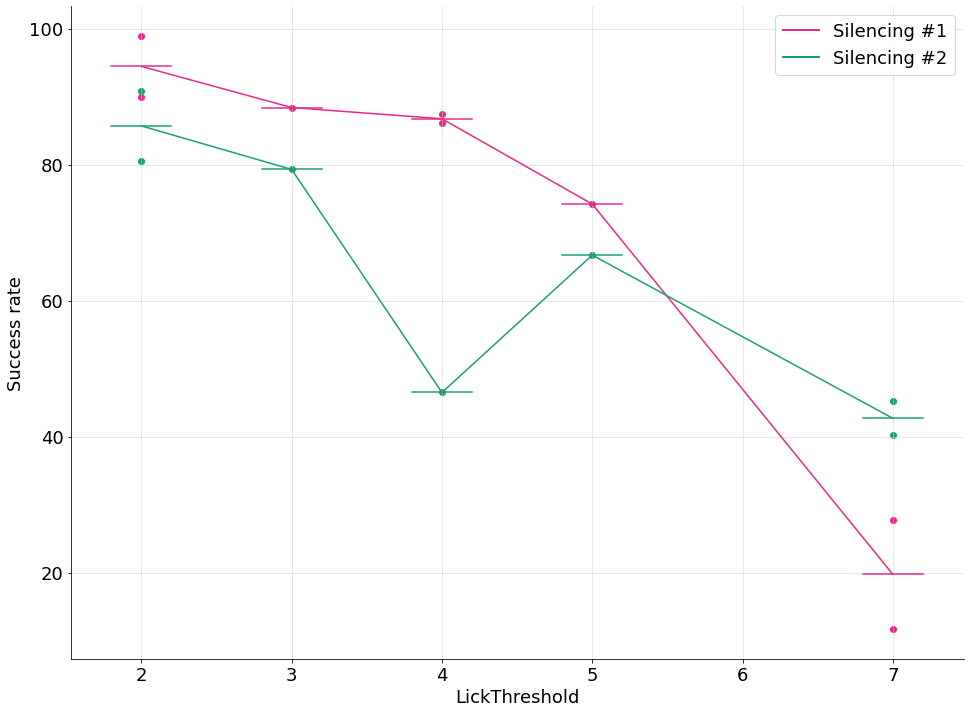

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog

# Define the data for Silencing #1
silencing1_data = {
    2: [90.0, 98.9],
    3: [88.4],
    4: [86.1, 87.4],
    5: [74.2],
    7: [27.8, 11.7]
}

# Define the data for Silencing #2
silencing2_data = {
    2: [80.5, 90.9],
    3: [79.3],
    4: [46.5],
    5: [66.7],
    7: [45.2, 40.2]
}

# Combine the data for both Silencings
combined_data = [silencing1_data, silencing2_data]

# Define the colors to use for each Silencing
colors = ['#e7298a', '#1b9e77']

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_facecolor('white')
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Plot the data
for i, data in enumerate(combined_data):
    for key in data:
        y_values = data[key]
        x_values = np.full(len(y_values), key)
        plt.scatter(x_values, y_values, color=colors[i])
        avg_y = np.mean(y_values)
        plt.plot([key-0.2, key+0.2], [avg_y, avg_y], color=colors[i])

    # Draw a line connecting the data points for LickThreshold values 2-6
    x_values = np.array([2, 3, 4, 5, 6])
    y_values = [data[k] if k in data else [] for k in [2, 3, 4, 5, 6]]
    avg_y_values = [np.mean(values) for values in y_values if len(values) > 0]
    plt.plot(x_values[:len(avg_y_values)], avg_y_values, color=colors[i])

    # Draw a line connecting the data points for LickThreshold values 5 and 7
    x_values_5_and_7 = np.array([5, 7])
    y_values_5_and_7 = [np.mean(data[k]) for k in [5, 7]]
    plt.plot(x_values_5_and_7, y_values_5_and_7, color=colors[i])

# Add a legend and labels with correct colors and font size
legend_elements = [plt.Line2D([0], [0], color=colors[0], lw=2, label='Silencing #1'),
                   plt.Line2D([0], [0], color=colors[1], lw=2, label='Silencing #2')]

plt.legend(handles=legend_elements, fontsize=18)
plt.xlabel('LickThreshold', fontsize=18)
plt.tick_params(axis='both', labelsize=18)
plt.ylabel('Success rate', fontsize=18)

# beautify the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set a fixed file path for saving the figure
file_path = "/Users/jun/Documents/Work/Project/Intralingual parasympathetic ganglion neurons/Behavior/ILPG_silencing_#2/SuccessRate_IPLG_20230424.pdf"

# Save the figure
plt.savefig(file_path, dpi=1200, format='pdf', facecolor=fig.get_facecolor(), edgecolor='none')

# Show the plot using the Figure object's show() method
fig.show()

